<h1>Импорт библиотек

In [3]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [14]:
def sum_prod(X, V):
    if len(X) != len(V):
        raise ValueError("Количество матриц и векторов должно быть одинаковым")
    if not X:
        return np.array([])
    n = X[0].shape[0]
    products = []
    
    for i, (matrix, vector) in enumerate(zip(X, V)):
        if matrix.shape != (n, n):
            raise ValueError(f"Несовместимые размерности матрицы {i}")
        
        v = np.array(vector).flatten()
        if len(v) != n:
            raise ValueError(f"Несовместимые размерности вектора {i}")
        
        products.append(np.dot(matrix, v))
    
    return np.sum(products, axis=0)

def test_sum_prod():
    X = [np.array([[1, 2], [3, 4]]), np.array([[5, 6], [7, 8]])]
    V = [np.array([1, 2]), np.array([3, 4])]
    result = sum_prod(X, V)
    expected = np.array([44, 64])  # (1*1+2*2 + 5*3+6*4, 3*1+4*2 + 7*3+8*4)
    assert np.array_equal(result, expected), f"Ожидалось {expected}, получено {result}"

if __name__ == "__main__":
    test_sum_prod()

<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [15]:
import numpy as np

def binarize(W, threshold=0.5):
    if not isinstance(threshold, (int, float)):
        raise ValueError("Порог должен быть числом")
    return (W > threshold).astype(int)

def test_binarize():
    W = np.array([[0.1, 0.6, 0.3],
                  [0.8, 0.4, 0.9]])
    result = binarize(W, 0.5)
    expected = np.array([[0, 1, 0],
                         [1, 0, 1]])
    assert np.array_equal(result, expected), f"Ожидалось:\n{expected}\nПолучено:\n{result}"

if __name__ == "__main__":
    test_binarize()

<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [16]:
import numpy as np

def unique_rows(mat):
    if not isinstance(mat, np.ndarray):
        raise ValueError("Входные данные должны быть numpy array")
    
    if len(mat.shape) != 2:
        raise ValueError("Матрица должна быть двумерной")
    
    result = []
    for i in range(mat.shape[0]):
        unique_elements = np.unique(mat[i, :])
        result.append(unique_elements)
    return result

def unique_columns(mat):
    if not isinstance(mat, np.ndarray):
        raise ValueError("Входные данные должны быть numpy array")
    
    if len(mat.shape) != 2:
        raise ValueError("Матрица должна быть двумерной")
    
    result = []
    for j in range(mat.shape[1]):
        unique_elements = np.unique(mat[:, j])
        result.append(unique_elements)
    return result

def test_unique_rows_columns():
    mat = np.array([[1, 2, 1],
                    [3, 3, 3],
                    [1, 2, 3]])
    
    row_result = unique_rows(mat)
    row_expected = [np.array([1, 2]), np.array([3]), np.array([1, 2, 3])]
    for i, (res, exp) in enumerate(zip(row_result, row_expected)):
        assert np.array_equal(res, exp), f"Строка {i}: ожидалось {exp}, получено {res}"
    
    col_result = unique_columns(mat)
    col_expected = [np.array([1, 3]), np.array([2, 3]), np.array([1, 3])]
    for j, (res, exp) in enumerate(zip(col_result, col_expected)):
        assert np.array_equal(res, exp), f"Столбец {j}: ожидалось {exp}, получено {res}"

if __name__ == "__main__":
    test_unique_rows_columns()

<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

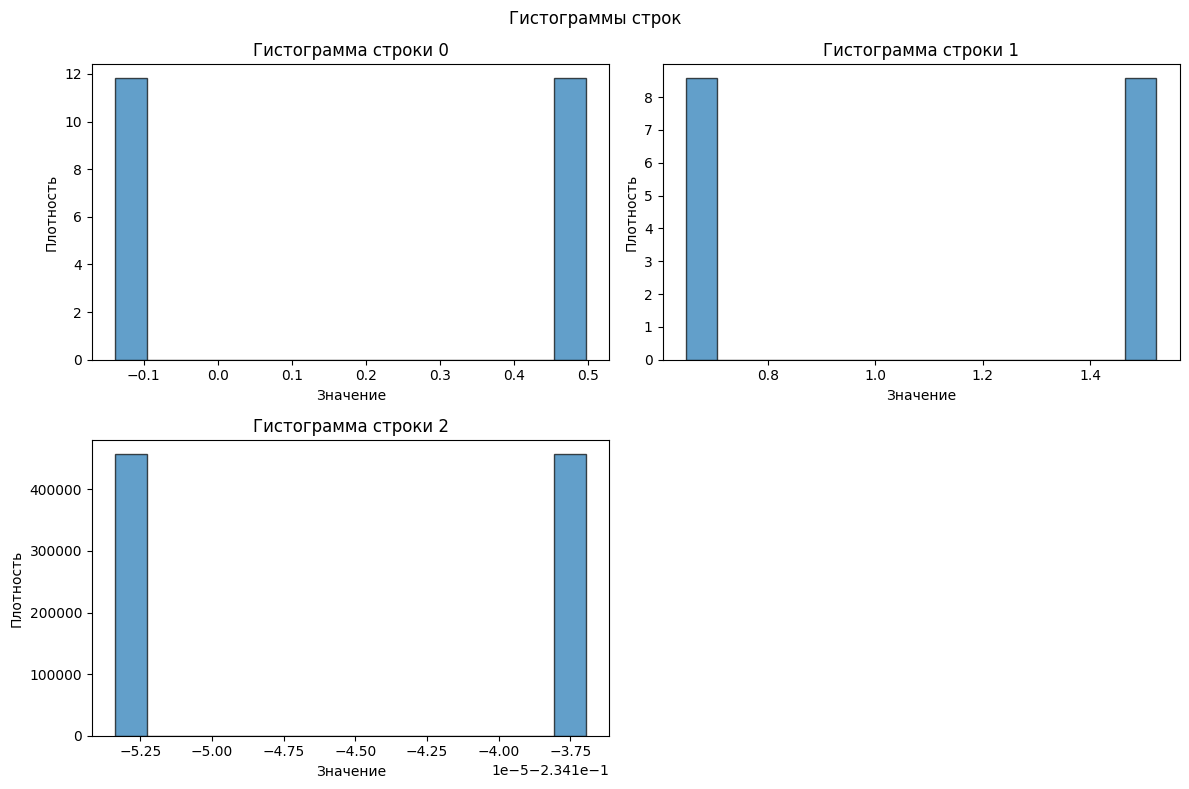

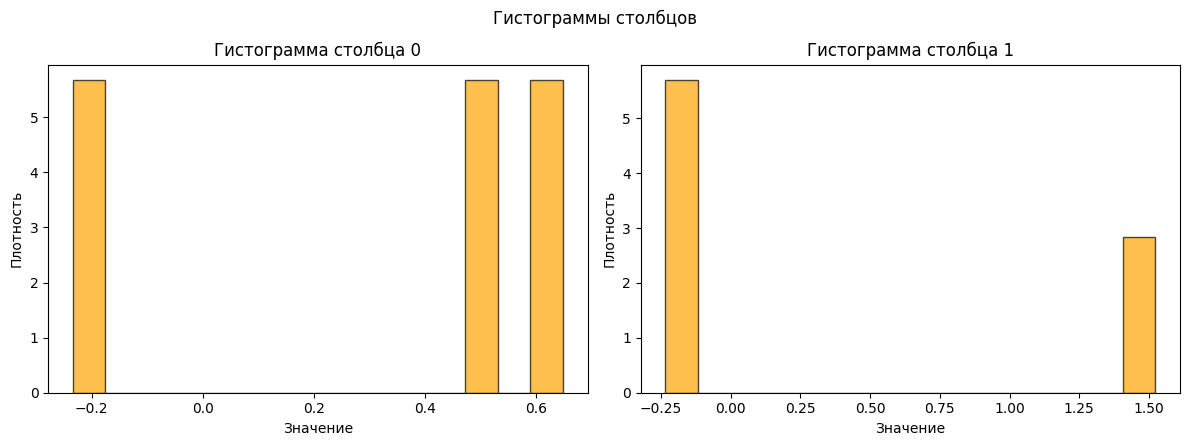

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def analyze_matrix(m, n, mu=0, sigma=1):
    matrix = np.random.normal(mu, sigma, (m, n))

    row_means = np.mean(matrix, axis=1)
    row_vars = np.var(matrix, axis=1)
    
    col_means = np.mean(matrix, axis=0)
    col_vars = np.var(matrix, axis=0)
    
    _plot_histograms(matrix, m, n)
    
    return matrix, row_means, row_vars, col_means, col_vars

def _plot_histograms(matrix, m, n):
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    axes = axes.flatten()
    
    for i in range(min(m, 4)):
        axes[i].hist(matrix[i, :], bins=15, alpha=0.7, edgecolor='black', density=True)
        axes[i].set_title(f'Гистограмма строки {i}')
        axes[i].set_xlabel('Значение')
        axes[i].set_ylabel('Плотность')
    
    for i in range(min(m, 4), 4):
        axes[i].set_visible(False)
    
    plt.suptitle('Гистограммы строк')
    plt.tight_layout()
    plt.show()
    
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    axes = axes.flatten()
    
    for j in range(min(n, 4)):
        axes[j].hist(matrix[:, j], bins=15, alpha=0.7, edgecolor='black', 
                    color='orange', density=True)
        axes[j].set_title(f'Гистограмма столбца {j}')
        axes[j].set_xlabel('Значение')
        axes[j].set_ylabel('Плотность')
    
    for j in range(min(n, 4), 4):
        axes[j].set_visible(False)
    
    plt.suptitle('Гистограммы столбцов')
    plt.tight_layout()
    plt.show()

def test_analyze_matrix():
    np.random.seed(42)
    m, n = 3, 2
    matrix, row_means, row_vars, col_means, col_vars = analyze_matrix(m, n)
    
    assert matrix.shape == (m, n), f"Неверная форма матрицы: {matrix.shape}"
    assert row_means.shape == (m,), f"Неверная форма row_means: {row_means.shape}"
    assert col_means.shape == (n,), f"Неверная форма col_means: {col_means.shape}"
    
    for i in range(m):
        expected_mean = np.mean(matrix[i, :])
        assert abs(row_means[i] - expected_mean) < 1e-10, f"Неверное среднее для строки {i}"

if __name__ == "__main__":
    test_analyze_matrix()


<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [18]:
import numpy as np

def chess(m, n, a, b):
    i_indices, j_indices = np.ogrid[:m, :n]
    chess_mask = (i_indices + j_indices) % 2 == 0
    matrix = np.full((m, n), b, dtype=type(a) if a != b else int)
    matrix[chess_mask] = a
    return matrix

def test_chess():
    result = chess(2, 2, 0, 1)
    expected = np.array([[0, 1],
                         [1, 0]])
    assert np.array_equal(result, expected), f"Ожидалось:\n{expected}\nПолучено:\n{result}"

if __name__ == "__main__":
    test_chess()

<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    image = np.full((m, n, 3), background_color, dtype=np.uint8)
    center_x = n // 2
    center_y = m // 2
    left = center_x - b // 2
    right = center_x + b // 2 + (b % 2)
    top = center_y - a // 2
    bottom = center_y + a // 2 + (a % 2)
    left = max(0, left)
    right = min(n, right)
    top = max(0, top)
    bottom = min(m, bottom)
    image[top:bottom, left:right] = rectangle_color
    return image

def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    image = np.full((m, n, 3), background_color, dtype=np.uint8)
    center_x = n // 2
    center_y = m // 2
    y_coords, x_coords = np.ogrid[:m, :n]
    x_rel = x_coords - center_x
    y_rel = y_coords - center_y
    ellipse_mask = (x_rel * x_rel) / (b * b) + (y_rel * y_rel) / (a * a) <= 1
    image[ellipse_mask] = ellipse_color
    return image

WHITE = [255, 255, 255]
BLACK = [0, 0, 0]
RED = [255, 0, 0]
BLUE = [0, 0, 255]
GREEN = [0, 255, 0]

def test_draw_shapes():
    rect = draw_rectangle(20, 30, 50, 60, RED, WHITE)
    assert rect.shape == (50, 60, 3), f"Неверный размер прямоугольника: {rect.shape}"
    assert np.array_equal(rect[0, 0], WHITE), "Фон должен быть белым"
    assert np.array_equal(rect[25, 30], RED), "Центр прямоугольника должен быть красным"
    
    ellipse = draw_ellipse(15, 25, 40, 50, BLUE, WHITE)
    assert ellipse.shape == (40, 50, 3), f"Неверный размер эллипса: {ellipse.shape}"
    assert np.array_equal(ellipse[0, 0], WHITE), "Фон должен быть белым"

if __name__ == "__main__":
    test_draw_shapes()

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [23]:
def analyze_time_series_optimized(series, window_size):
    if window_size > len(series) or window_size < 1:
        raise ValueError("Размер окна должен быть между 1 и длиной ряда")

    series = np.array(series)
    
    mean = np.mean(series)
    variance = np.var(series)
    std_dev = np.std(series)
    
    greater_than_left = series[1:-1] > series[:-2]
    greater_than_right = series[1:-1] > series[2:]
    less_than_left = series[1:-1] < series[:-2]
    less_than_right = series[1:-1] < series[2:]
    
    local_maxima = np.where(greater_than_left & greater_than_right)[0] + 1
    local_minima = np.where(less_than_left & less_than_right)[0] + 1
    
    moving_avg = np.convolve(series, np.ones(window_size)/window_size, mode='valid')
    
    return {
        'mean': mean,
        'variance': variance,
        'std_dev': std_dev,
        'local_maxima': local_maxima,
        'local_minima': local_minima,
        'moving_avg': moving_avg
    }

def test_analyze_time_series():
    series = [1, 2, 3, 2, 1, 4, 3, 5, 2]
    result = analyze_time_series_optimized(series, 3)
    
    assert abs(result['mean'] - 2.555) < 0.001, f"Неверное среднее: {result['mean']}"
    assert np.array_equal(result['local_maxima'], [2, 5, 7]), f"Неверные максимумы: {result['local_maxima']}"
    assert np.array_equal(result['local_minima'], [4, 6]), f"Неверные минимумы: {result['local_minima']}"
    assert len(result['moving_avg']) == 7, f"Неверная длина скользящего среднего: {len(result['moving_avg'])}"

if __name__ == "__main__":
    test_analyze_time_series()

<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]
    

In [24]:
import numpy as np

def one_hot_encoding(labels):
    if len(labels) == 0:
        return np.array([])
    
    labels = np.array(labels)
    unique_classes = np.unique(labels)
    num_classes = len(unique_classes)
    num_samples = len(labels)
    
    one_hot = np.zeros((num_samples, num_classes), dtype=int)
    
    class_to_index = {cls: idx for idx, cls in enumerate(unique_classes)}
    
    for i, label in enumerate(labels):
        one_hot[i, class_to_index[label]] = 1
    
    return one_hot

def test_one_hot_encoding():
    """Тест для one_hot_encoding"""
    labels = [0, 2, 3, 0]
    result = one_hot_encoding(labels)
    expected = np.array([[1, 0, 0, 0],
                         [0, 0, 1, 0],
                         [0, 0, 0, 1],
                         [1, 0, 0, 0]])
    assert np.array_equal(result, expected), f"Ожидалось:\n{expected}\nПолучено:\n{result}"

if __name__ == "__main__":
    test_one_hot_encoding()

AssertionError: Ожидалось:
[[1 0 0 0]
 [0 0 1 0]
 [0 0 0 1]
 [1 0 0 0]]
Получено:
[[1 0 0]
 [0 1 0]
 [0 0 1]
 [1 0 0]]